In [2]:
from tensor import Tensor
import numpy as np
import nn
import torch
from sklearn import datasets

In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

TypeError: MLP.__init__() missing 2 required positional arguments: 'n_in' and 'n_out'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [3]:
from sklearn import datasets

In [11]:
datasets.make_regression(n_samples=200, n_features=2, noise=0.01)

(array([[-0.37988947,  0.05099247],
        [ 0.58493451, -0.798081  ],
        [ 1.04167054,  0.74203373],
        [-2.86375784,  0.58412593],
        [ 1.03509501,  0.47722211],
        [ 0.537244  ,  1.18953602],
        [ 0.59130794, -0.73619249],
        [ 0.34538168, -0.0382666 ],
        [-1.11921492,  1.06750063],
        [ 0.88444262,  1.47938184],
        [-0.02414129,  0.74867554],
        [-0.69657555, -0.86273344],
        [-2.35665649,  0.42522904],
        [ 1.300929  , -2.67400544],
        [-2.37987777,  0.01012245],
        [-0.82709791, -1.7800778 ],
        [-1.37558475, -0.40835085],
        [-1.09512129, -1.5971113 ],
        [-1.50145152, -0.8248431 ],
        [ 0.12458102, -1.38277224],
        [ 0.8473867 ,  0.84127458],
        [ 0.69786211, -0.50552855],
        [ 0.58246639, -0.2890588 ],
        [ 0.79505177,  0.32554748],
        [ 0.56900632,  0.2725109 ],
        [ 1.33618627,  0.30505305],
        [ 0.09898389, -0.18741819],
        [-0.11827806,  0.007

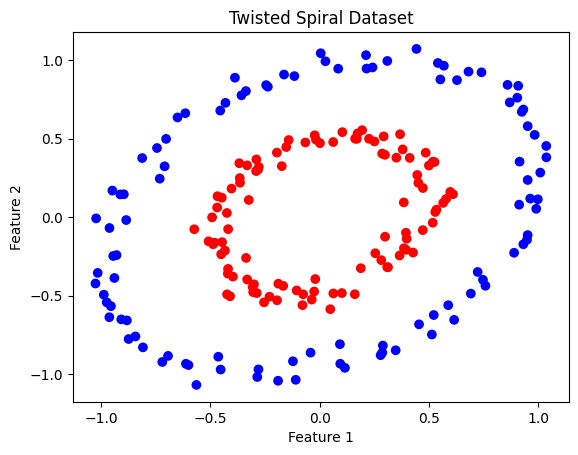

NameError: name 'Tensor' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [64]:
def kaiming_uniform(shape, gain=np.sqrt(2)):
    """
    Kaiming Uniform initialization (He initialization) for weight matrices.

    Args:
    shape (tuple): The shape of the weight matrix.
    gain (float): The scaling factor (recommended sqrt(2) for ReLU).

    Returns:
    numpy.ndarray: The initialized weights.
    """
    print(shape[:-1])
    fan_in = np.prod(shape[:-1])  # Product of dimensions except the last dimension
    std = gain / np.sqrt(fan_in)  # Calculate standard deviation
    limit = np.sqrt(3.0) * std  # Calculate limit for uniform distribution

    return np.random.uniform(-limit, limit, size=shape)

In [65]:
kaiming_uniform((1, 30)).std()

(1,)


1.3609795497380417

In [58]:
div = 1. / np.sqrt(1)

np.random.uniform(-div, div, (30, 1)).std()

0.5480296227365216

In [42]:
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor

kaiming_uniform_np(1, 30).std()

tensor(1.3837)

In [24]:
Tensor.kaiming_uniform(1, 30).data.std()

2.0763154

In [45]:
torch.nn.Linear(1, 30).weight.data.std()

tensor(0.6320)

In [2]:
import torch

In [8]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=0.01)
y.reshape(-1, 1)

array([[ 1.34808479e+01],
       [ 1.95015536e+01],
       [ 9.26908849e+00],
       [-7.11581725e+01],
       [ 3.82720009e+01],
       [-2.02885994e+01],
       [-4.51040988e+01],
       [-2.99703446e+00],
       [-5.36353356e+01],
       [ 2.99604916e+01],
       [ 2.50319926e+01],
       [ 1.04251160e+01],
       [ 2.14645088e+01],
       [-1.32464234e+01],
       [ 6.29139272e+01],
       [ 9.49373062e+01],
       [ 2.41986366e+00],
       [ 2.49414707e+01],
       [ 5.90874473e+01],
       [-1.32988455e+01],
       [-4.08545268e+01],
       [ 5.01039319e+01],
       [ 9.43388459e+01],
       [ 1.31495079e+01],
       [ 2.87668639e+01],
       [-8.99283457e+01],
       [ 5.16602512e+01],
       [-8.32871601e+01],
       [ 2.80392787e+01],
       [-5.47252391e+01],
       [ 4.75007538e+00],
       [ 1.42287816e+01],
       [-3.92285690e+01],
       [ 3.04828626e+01],
       [-4.81688788e+01],
       [ 2.85847082e+00],
       [ 1.83038978e+01],
       [ 4.37668251e+01],
       [-1.2

In [7]:
import nn
from tensor import Tensor
# Generate the data
# n_samples = 200
X, y = datasets.make_regression(n_samples=1000, n_features=100, noise=0.01)
import time
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(100, 2048)
        self.fc2 = nn.Linear(2048, 2048) # Second hidden layer, 64 neurons
        self.output = nn.Linear(2048, 100) # Output layer, 1 output value

    def __call__(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.0001, momentum=0.9)
loss_fn = nn.MSELoss()

x = Tensor(X)
y_real = Tensor(y).reshape(-1, 1)

epochs = 500
start_time = time.time() 
for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_real)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time   

print(elapsed_time)

Epoch [10/500], Loss: 31109.421875
Epoch [20/500], Loss: 31104.693359375
Epoch [30/500], Loss: 31096.7265625
Epoch [40/500], Loss: 31081.283203125
Epoch [50/500], Loss: 31047.93359375
Epoch [60/500], Loss: 30969.1875
Epoch [70/500], Loss: 30758.580078125
Epoch [80/500], Loss: 30078.73046875
Epoch [90/500], Loss: 27268.603515625
Epoch [100/500], Loss: 15240.7255859375
Epoch [110/500], Loss: 2808.72607421875
Epoch [120/500], Loss: 1188.68603515625
Epoch [130/500], Loss: 512.91357421875
Epoch [140/500], Loss: 297.84857177734375
Epoch [150/500], Loss: 193.2275848388672
Epoch [160/500], Loss: 110.69011688232422
Epoch [170/500], Loss: 69.50608825683594
Epoch [180/500], Loss: 50.1485710144043
Epoch [190/500], Loss: 38.389549255371094
Epoch [200/500], Loss: 30.448320388793945
Epoch [210/500], Loss: 24.696334838867188
Epoch [220/500], Loss: 20.25763702392578
Epoch [230/500], Loss: 16.7406005859375
Epoch [240/500], Loss: 13.935633659362793
Epoch [250/500], Loss: 11.66395092010498
Epoch [260/500]

In [4]:
a = np.random.randn(200, 1)  
b = np.random.randn(200, )

a += b

ValueError: non-broadcastable output operand with shape (200,1) doesn't match the broadcast shape (200,200)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import time


X, y = datasets.make_regression(n_samples=1000, n_features=100, noise=0.01)


grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(100, 2048)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2048, 2048)
        self.output = nn.Linear(2048, 100)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    start_time = time.time() 
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    end_time = time.time()
    diff = end_time - start_time
    print(diff)

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, X, y, epochs=500)
# plt.plot(np.arange(0, len(grads), 1), grads)

/Users/cameronolson/opt/anaconda3/envs/ptb/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/500], Loss: 42031.2188
Epoch [20/500], Loss: 42024.4375
Epoch [30/500], Loss: 42011.6172
Epoch [40/500], Loss: 41983.0586
Epoch [50/500], Loss: 41911.2383
Epoch [60/500], Loss: 41703.7109
Epoch [70/500], Loss: 40955.4062
Epoch [80/500], Loss: 37265.7500
Epoch [90/500], Loss: 19113.6523
Epoch [100/500], Loss: 6299.9795
Epoch [110/500], Loss: 1630.9171
Epoch [120/500], Loss: 722.9653
Epoch [130/500], Loss: 320.7168
Epoch [140/500], Loss: 166.0448
Epoch [150/500], Loss: 108.3798
Epoch [160/500], Loss: 69.4960
Epoch [170/500], Loss: 49.8450
Epoch [180/500], Loss: 36.9950
Epoch [190/500], Loss: 28.0290
Epoch [200/500], Loss: 21.8564
Epoch [210/500], Loss: 17.3029
Epoch [220/500], Loss: 13.8885
Epoch [230/500], Loss: 11.2813
Epoch [240/500], Loss: 9.2537
Epoch [250/500], Loss: 7.6591
Epoch [260/500], Loss: 6.3901
Epoch [270/500], Loss: 5.3696
Epoch [280/500], Loss: 4.5433
Epoch [290/500], Loss: 3.8688
Epoch [300/500], Loss: 3.3144
Epoch [310/500], Loss: 2.8556
Epoch [320/500], Loss

In [6]:
import math

preds = [2, -1.2, 4, 8]

def softmax(z):
    K = len(z)
    out = []
 
    # Pre comp the sum
    total_exp_values = 0
    for j in range(K):
        total_exp_values += math.exp(z[j])

    for i in range(len(preds)):
        out.append(math.exp(z[i])/total_exp_values)
    return out
            

In [26]:
import numpy as np

In [27]:
def np_softmax(a):
    a = a if isinstance(a, np.ndarray) else np.array(a)
    e = np.exp(a)
    return e/np.sum(e)

In [31]:
def other_softmax(a):
    a = a if isinstance(a, np.ndarray) else np.array(a)
    m = a - np.max(a)
    e = np.exp(m)
    return e/np.sum(e)

In [32]:
np_softmax(preds)

array([2.42801770e-03, 9.89713528e-05, 1.79407590e-02, 9.79532252e-01])

In [33]:
other_softmax(preds)

array([2.42801770e-03, 9.89713528e-05, 1.79407590e-02, 9.79532252e-01])

In [7]:
softmax(preds)

[0.002428017701609162,
 9.897135281607659e-05,
 0.017940759006386756,
 0.979532251939188]

In [8]:
import torch

In [ ]:
  def _softmax(self, axis):
    m = self - self.max(axis=axis, keepdim=True)
    e = m.exp()
    return m, e, e.sum(axis=axis, keepdim=True)

In [46]:
def log_softmax(z, axis=-1):
    max_tensor = z.max(axis=axis, keepdims=True)
    m = z - max_tensor
    e = np.exp(m)
    s = e.sum(axis=axis, keepdims=True)
    return m - np.log(s)

In [54]:
inp = np.array([preds])

In [55]:
inp

array([[ 2. , -1.2,  4. ,  8. ]])

In [56]:
data = log_softmax(inp)

In [59]:
preds = [0, 1, 2, 3]

In [66]:
N = data.shape[0]
print(N)
log_probs = data  # Assume self is already log_softmax output
print(log_probs)
nll = -log_probs[np.arange(N), np.array([[0, 0, 2, 3]])]
print(nll)

1
[[-6.02068012 -9.22068012 -4.02068012 -0.02068012]]
[[6.02068012 6.02068012 4.02068012 0.02068012]]


In [69]:
np.arange(N)

array([0])

In [68]:
log_probs[preds = [2, -1.2, 4, 8]]

array([[-6.02068012, -9.22068012, -4.02068012, -0.02068012]])

In [114]:
# Parameters for the normal distribution
mean = 0  # mean of the distribution
std_dev = 1  # standard deviation of the distribution
num_samples = 500  # number of samples to generate

# Generate the data
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
data = list(data)

In [115]:
def calculate_likelihood(data, mean, std_dev):
    n = len(data)
    variance = std_dev ** 2
    likelihood = 1
    for x in data:
        norm_factor = 1/math.sqrt(2 * math.pi * variance)
        exp_term = math.exp(-((x - mean) ** 2) / (2 * variance))
        likelihood *= (norm_factor * exp_term)
    return likelihood

In [116]:
mean_range = [i / 10.0 for i in range(-50, 51)]
std_dev_range = [i / 10.0 for i in range(1, 51)]  # std_dev should be positive

# Variables to store the best parameters and the highest likelihood
best_mean = None
best_std_dev = None
highest_likelihood = -float('inf')

# Trial and error for mean
for m in mean_range:
    likelihood = calculate_likelihood(data, m, std_dev)
    if likelihood > highest_likelihood:
        highest_likelihood = likelihood
        best_mean = m
print(f"Best mean: {best_mean}, Likelihood: {highest_likelihood}")

# Reset highest likelihood for std deviation optimization
highest_likelihood = -float('inf')

# Trial and error for std deviation
for s in std_dev_range:
    likelihood = calculate_likelihood(data, best_mean, s)
    if likelihood > highest_likelihood:
        highest_likelihood = likelihood
        best_std_dev = s

print(f"Best std deviation: {best_std_dev}, Likelihood: {highest_likelihood}")

Best mean: -0.1, Likelihood: 4.2627010697636934e-305
Best std deviation: 1.0, Likelihood: 4.2627010697636934e-305


In [118]:
import math

# Generate data using numpy (you can skip this if you have your own data)
import numpy as np
mean = 0
std_dev = 1
num_samples = 100000
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Save data to a list (you can replace this with your own data)
data = list(data)

# Function to calculate the log-likelihood of the data given a mean and std deviation
def calculate_log_likelihood(data, mean, std_dev):
    n = len(data)
    variance = std_dev ** 2
    log_likelihood = 0
    for x in data:
        log_likelihood += -0.5 * math.log(2 * math.pi * variance) - ((x - mean) ** 2) / (2 * variance)
    return log_likelihood

# Define the range and step size for mean and std deviation
mean_range = [i / 10.0 for i in range(-50, 51)]
std_dev_range = [i / 10.0 for i in range(1, 51)]  # std_dev should be positive

# Variables to store the best parameters and the highest likelihood
best_mean = None
best_std_dev = None
highest_log_likelihood = -float('inf')

# Trial and error for mean
for m in mean_range:
    log_likelihood = calculate_log_likelihood(data, m, std_dev)
    if log_likelihood > highest_log_likelihood:
        highest_log_likelihood = log_likelihood
        best_mean = m

print(f"Best mean: {best_mean}, Log-Likelihood: {highest_log_likelihood}")

# Reset highest log-likelihood for std deviation optimization
highest_log_likelihood = -float('inf')

# Trial and error for std deviation
for s in std_dev_range:
    log_likelihood = calculate_log_likelihood(data, best_mean, s)
    if log_likelihood > highest_log_likelihood:
        highest_log_likelihood = log_likelihood
        best_std_dev = s

print(f"Best std deviation: {best_std_dev}, Log-Likelihood: {highest_log_likelihood}")


Best mean: 0.0, Log-Likelihood: -141879.50135441098
Best std deviation: 1.0, Log-Likelihood: -141879.50135441098


In [119]:
import numpy as np

def sig(z):
    return 1/(1+np.exp(-z))

x = np.array([1, 2, 3])


sig(x)
    

array([0.73105858, 0.88079708, 0.95257413])

In [126]:
# Conditional Probability
order = [1, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2]

# what is the conditoinal probability that 2 comes after 1?

# Count probs
A = 0
B = 0

# iterate through the list
for i in range(len(order) - 1):
    if order[i] == 1:
        A += 1
        if order[i + 1] == 2:
            B += 1

total = len(order)

# convert A & B to probabilities

if A != 0:
    prob = B / A
else:
    prob = 0
prob

0.75

3

In [144]:
import numpy as np

# Generate synthetic data
np.random.seed(42)
N = 100  # Number of data points
X = np.random.randn(N, 2)  # Two input features
true_theta = np.array([2, -3])  # True parameters

# Generate labels based on the true parameters
z = X @ true_theta


probabilities = 1 / (1 + np.exp(-z))

print(np.min(probabilities))
y = np.random.binomial(1, probabilities)

0.00016826180268614185


In [148]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_prob(X, theta):
    return sigmoid(X @ theta)

def likelihood(X, y, theta):
    # X = inputs
    # theta = parameters
    y_hat = predict_prob(X, theta) # y_hat = probabilities
    likelihood = np.prod(y_hat ** y * (1 - y_hat) ** 1 - 1)
    return likelihood

def log_likelihood(X, y, theta):
    y_hat = predict_prob(X, theta)
    return np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


def gradient_ascent(X, y, theta, learning_rate=0.01, iterations=100):
    for i in range(iterations):
        y_hat = predict_prob(X, theta)
        gradient = X.T @ (y - y_hat) # grad of log_likelihood.
        theta += learning_rate * gradient
        if i % 1 == 0:
            print(log_likelihood(X, y, theta))
    return theta

# Initialize parameters
theta_init = np.random.randn(2)
print(f"Initial parameters: {theta_init}")

# Perform gradient ascent
theta_est = gradient_ascent(X, y, theta_init)
print(f"Estimated parameters: {theta_est}")
# Calculate final log-likelihood
final_log_likelihood = log_likelihood(X, y, theta_est)
print(f"Final log-likelihood: {final_log_likelihood}")

Initial parameters: [-0.58936476  0.8496021 ]
-88.3435435957923
-68.68582564787398
-56.79379278472694
-49.42284990425024
-44.52173950251299
-41.041547260353006
-38.43982658441805
-36.41682099962469
-34.795188453675905
-33.463648094263434
-32.34887765863472
-31.400576311744302
-30.583057657902938
-29.870277795714205
-29.24276712789212
-28.68566644532715
-28.18742944383354
-27.738941581549717
-27.332907039068733
-26.963412999439942
-26.625614018453334
-26.315499465169
-26.02971952617209
-25.765453210049728
-25.520306944721092
-25.292235776003007
-25.079481480845267
-24.880523490706445
-24.694039623318332
-24.518874400844723
-24.354013291114757
-24.19856161380525
-24.051727150680865
-23.91280571935684
-23.78116913503252
-23.656255109316614
-23.537558730295597
-23.42462524102677
-23.31704389019155
-23.21444267275892
-23.11648381315566
-23.022859870827656
-22.93329036985986
-22.847518871749084
-22.765310424442305
-22.68644933209098
-22.610737199185472
-22.537991210259726
-22.468042612529917

In [ ]:
likelihood(X, y, 

In [175]:
points = [1, 2, 4, 3, 8, 2, 1, 6, 5]

# We sum the distances
def square_dist_calculator(B, points):
    total_distance = 0
    for point in points:
        distance = (B - point) ** 2
        total_distance += distance
    return total_distance

search_space = [i / 10 for i in range(-100, 100)]
# Search for the optimal B

optimal_B = None
min_total_squared_distance = float('inf')

for B in search_space:
    current_squared_distance = square_dist_calculator(B, points)
    if current_squared_distance < min_total_squared_distance:
        min_total_squared_distance = current_squared_distance
        optimal_B = B

# Print the optimal B and the corresponding minimum squared distance
print(f"Optimal B: {optimal_B}")
print(f"Minimum Total Squared Distance: {min_total_squared_distance}")

Optimal B: 3.6
Minimum Total Squared Distance: 46.24


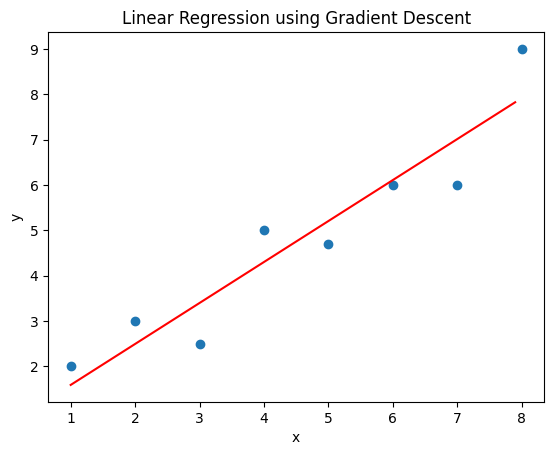

Final total squared error: 0.2615125017173736
Optimized parameters: a = 0.903350635894281, b = 0.6874565724124502


In [220]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 3, 2.5, 5, 4.7, 6, 6, 9])

# Initial parameters
a = 1.2
b = 0
learning_rate = 0.01
epochs = 1000

# Cost function
def total_squared_error(a, b, x, y):
    total_distance = 0
    for xi, yi in zip(x, y):
        distance = (a * xi + b - yi) ** 2
        total_distance += distance
    return total_distance / (2 * len(x))

# Gradient descent
def gradient_descent(a, b, x, y, learning_rate, epochs):
    m = len(x)
    for _ in range(epochs):
        da = sum((a * x + b - y) * x) / m
        db = sum(a * x + b - y) / m
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b


# Train the model
a, b = gradient_descent(a, b, x, y, learning_rate, epochs)

# Plotting the data points and the linear regression line
plt.scatter(x, y)
dummy = np.arange(1, np.max(x), 0.1)
z = a * dummy + b
plt.plot(dummy, z, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.show()

# Final total squared error
final_error = total_squared_error(a, b, x, y)
print(f'Final total squared error: {final_error}')
print(f'Optimized parameters: a = {a}, b = {b}')

In [222]:
# logistic regression

# def logistic_function()
(0.3)**2

0.09

In [223]:
0.5**2

0.25

In [224]:
0.5 * 0.5

0.25

In [246]:
# Multiplied probabilities
import random

def flip_coin():
    """
    Simulate a fair coin flip.
    
    Returns:
    int: 1 for heads, 0 for tails.
    """
    return random.choice([0, 1])

# known probability = 0.5 for heads, so what is the probability of heads 5 times in a row
five_heads_probability = 0.5**5

def simulate_coin_flips(num_trials):
    """
    Simulate flipping two coins num_trials times and calculate the joint probability.
    
    Parameters:
    num_trials (int): Number of trials to simulate.
    
    Returns:
    float: Empirical probability of both coins showing heads.
    """
    both_heads_count = 0
    
    for _ in range(num_trials):
        flips = []
        for _ in range(5):
            flips.append(flip_coin())        
        if all(flips):
            both_heads_count += 1
    
    return both_heads_count / num_trials

# Number of trials for the simulation
num_trials = 1000000000

# Simulate and calculate the empirical probability
empirical_probability = simulate_coin_flips(num_trials)
five_heads_probability = 0.5**5

print(f"Empirical probabilitys: {empirical_probability}")
print(f"Theoretical probability: {five_heads_probability}")

Empirical probabilitys: 0.03124615
Theoretical probability: 0.03125


In [242]:
all([1, 0])

False

In [240]:
all?

Signature: all(iterable, /)
Docstring:
Return True if bool(x) is True for all values x in the iterable.

If the iterable is empty, return True.
Type:      builtin_function_or_method

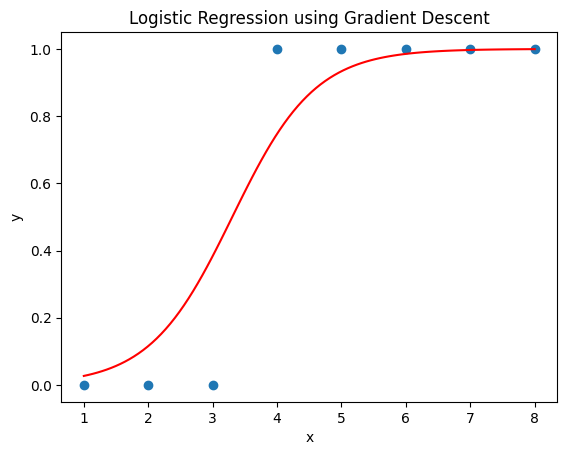

Final binary cross-entropy error: 0.12653457432520565
Optimized parameters: a = 1.5591026043881673, b = -5.152701302316421


In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1])  # Binary labels

# Initial parameters
a = 1.2
b = 0
learning_rate = 0.1
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Binary Cross-Entropy)
def binary_cross_entropy(a, b, x, y):
    total_cost = 0
    for xi, yi in zip(x, y):
        z = a * xi + b
        prediction = sigmoid(z)
        cost = -yi * np.log(prediction) - (1 - yi) * np.log(1 - prediction)
        total_cost += cost
    return total_cost / len(x)

# Gradient descent
def gradient_descent(a, b, x, y, learning_rate, epochs):
    m = len(x)
    for _ in range(epochs):
        da = sum((sigmoid(a * xi + b) - yi) * xi for xi, yi in zip(x, y)) / m
        db = sum(sigmoid(a * xi + b) - yi for xi, yi in zip(x, y)) / m
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b

# Train the model
a, b = gradient_descent(a, b, x, y, learning_rate, epochs)

# Plotting the data points and the logistic regression curve
plt.scatter(x, y)
dummy = np.linspace(1, np.max(x), 100)
z = sigmoid(a * dummy + b)
plt.plot(dummy, z, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression using Gradient Descent')
plt.show()

# Final binary cross-entropy error
final_error = binary_cross_entropy(a, b, x, y)
print(f'Final binary cross-entropy error: {final_error}')
print(f'Optimized parameters: a = {a}, b = {b}')


In [251]:
sigmoid(a * 3.5 + b)

0.5754586128043991

In [254]:
## Need to figure out the broadcast issue
import numpy as np
a = np.random.randn(4, 2)
b = np.random.randn(1, )

a + b

array([[-0.32406441, -1.31628414],
       [-0.68185103, -1.13616044],
       [-0.90902142, -0.41086036],
       [-1.82423806,  1.08636989]])

In [ ]:
# the broadcast dim. This is essential to understand.

In [259]:
a = np.random.randn(2, 2)
m_a = np.max(a, axis=1)

exp = np.expand_dims(m_a, axis=1)
print(a.shape)
print(exp.shape)

(2, 2)
(2, 1)


In [263]:
import numpy as np

a = np.random.randn(2, 2)
m_a = np.max(a, axis=1)

exp = np.expand_dims(m_a, axis=1)
print("Original shape of a:", a.shape)
print("Shape after expand_dims:", exp.shape)


grad_mask = a == exp
print(grad_mask)


# Replicate the expanded dimensions to match the original shape
correct_shape = np.tile(exp, (1, a.shape[1]))
print("Shape after tiling:", correct_shape.shape)
print(correct_shape)

Original shape of a: (2, 2)
Shape after expand_dims: (2, 1)
[[ True False]
 [False  True]]
Shape after tiling: (2, 2)
[[ 0.23204994  0.23204994]
 [-0.71844422 -0.71844422]]


In [261]:
broadcasted_m_a = m_a[:, np.newaxis]

In [262]:
broadcasted_m_a.shape

(2, 1)